Goals
Will implement and explore the cost function for linear regression with one variable.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [4]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

In [5]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

def compute_model_output(w, b, x_train):
    m = x_train.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x_train[i] + b
    return f_wb
    

our goal is to find a model  𝑓𝑤,𝑏(𝑥)=𝑤𝑥+𝑏 , with parameters  𝑤,𝑏 , which will accurately predict house values given an input  𝑥 . The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if  𝑤  and  𝑏  can be selected such that the predictions  𝑓𝑤,𝑏(𝑥)  match the target data  𝑦 , the  (𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2  term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that  𝑏=100  provided an optimal solution so let's set  𝑏  to 100 and focus on  𝑤 .



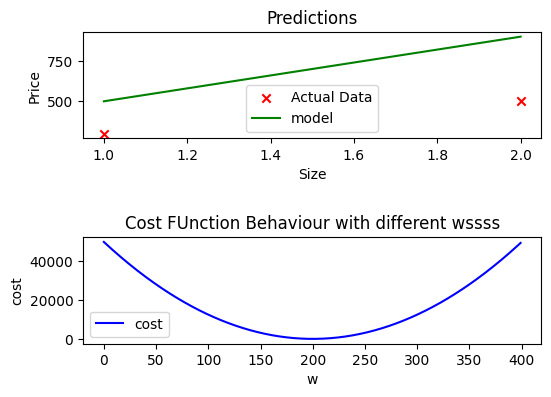

In [6]:
w = 400;
b = 100;
f_wb = compute_model_output(w, b, x_train)

figure1, plots = plt.subplots(2, 1)
figure1.tight_layout(pad=5.0)
#plt.rcParams['figure.figsize'] = [1,1]



w_array = np.zeros(w)
j_wb = np.zeros(w)
for i in range(w):
    w_array[i] = i
    j_wb[i] = compute_cost(x_train, y_train, i, b)
    
#print(j_wb)

plots[0].scatter(x_train, y_train, marker='x',c='r', label="Actual Data")
plots[0].plot(x_train, f_wb, c='g', label="model")
plots[1].plot(w_array, j_wb, c='b', label="cost")

plots[0].set_title("Predictions")
plots[1].set_title("Cost FUnction Behaviour with different wssss")

plots[0].set_xlabel("Size")
plots[0].set_ylabel("Price")
plots[1].set_xlabel("w")
plots[1].set_ylabel("cost")



plots[0].legend()
plots[1].legend()
plt.show()

[[124800.         124330.5        123862.         ... 126214.5
  125742.         125270.5       ]
 [123632.615      123165.34833333 122699.08166667 ... 125040.415
  124570.14833333 124100.88166667]
 [122470.79333333 122005.76       121541.72666667 ... 123871.89333333
  123403.86       122936.82666667]
 ...
 [128335.535      127859.335      127384.135      ... 129770.135
  129290.935      128812.735     ]
 [127151.46       126677.49333333 126204.52666667 ... 128579.36
  128102.39333333 127626.42666667]
 [125972.94833333 125501.215      125030.48166667 ... 127394.14833333
  126919.415      126445.68166667]]


Text(0.5, 0, 'z')

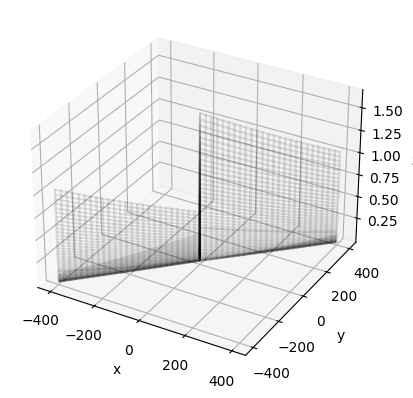

In [7]:
plt.close('all') 
fig = plt.figure()
ax = plt.axes(projection='3d')

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])


w = 400;
b = 400;

minw = -400
minb = -400

f_wb = compute_model_output(w, b, x_train)


w_array = np.zeros(w*2)
b_array = np.zeros(b*2)

j_wb = np.zeros((w*2,b*2))

i = minw
j = minb
for i in range(minw,w):
    for j in range(minb,b):
        j_wb[i,j] = compute_cost(x_train, y_train, i, j)
        if j_wb[i,j] == 0: j_wb[i,j] = 1e-6
   

n = minw
for s in range(w*2):
    w_array[s] = n
    n = n+1
n = minb
for s in range(b*2):
    b_array[s] = n
    n = n+1

print(j_wb)
#print(w_array)
#ax.contour(w_array, b_array, j_wb, 100)
ax.plot_wireframe(w_array, b_array, j_wb, color='k', alpha=0.1)
#ax.plot_surface(b_array, w_array, j_wb, rstride=1, cstride=1,
               #cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
